In [1]:
import bs4 as bs
import requests
import yfinance as yf
import datetime

In [2]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})

In [3]:
tickers = []

for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

In [4]:
tickers = [s.replace('\n', '') for s in tickers]

In [5]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2022, 1, 1)
data = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  503 of 503 completed

4 Failed downloads:
- BRK.B: No data found for this date range, symbol may be delisted
- CEG: Data doesn't exist for startDate = 1577854800, endDate = 1641013200
- BF.B: No data found for this date range, symbol may be delisted
- GEHC: Data doesn't exist for startDate = 1577854800, endDate = 1641013200


In [6]:
df = data.stack().reset_index().rename(index=str, columns={"level_1": "Symbol"}).sort_values(['Symbol','Date'])

In [17]:
import seaborn as sns
import numpy as np

In [32]:
X = np.array(df.groupby(['Symbol'])['Volume'].mean().reset_index().sort_values(by='Volume', ascending = False)[:25]['Symbol'])
X

array(['TSLA', 'AAPL', 'AMZN', 'F', 'BAC', 'AMD', 'T', 'AAL', 'NVDA',
       'CCL', 'GOOGL', 'WFC', 'PFE', 'MSFT', 'GOOG', 'INTC', 'XOM', 'MRO',
       'NCLH', 'OXY', 'UAL', 'C', 'FCX', 'CSCO', 'DAL'], dtype=object)

In [33]:
df2 = df.groupby(['Date', 'Symbol'])['Close'].mean().reset_index()

In [34]:
df3 = df2[df2['Symbol'].isin(X)]
df3

,Date,Symbol,Close
1,2020-01-02,AAL,29.090000
3,2020-01-02,AAPL,75.087502
29,2020-01-02,AMD,49.099998
34,2020-01-02,AMZN,94.900497
53,2020-01-02,BAC,35.639999
...,...,...,...
251472,2021-12-31,T,18.580059
251491,2021-12-31,TSLA,352.260010
251498,2021-12-31,UAL,43.779999
251525,2021-12-31,WFC,47.980000


In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12625 entries, 1 to 251537
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12625 non-null  datetime64[ns]
 1   Symbol  12625 non-null  object        
 2   Close   12625 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 394.5+ KB


_child0
_child1
_child2
_child3
_child4
_child5
_child6
_child7
_child8
_child9
_child10
_child11
_child12
_child13
_child14
_child15
_child16
_child17
_child18
_child19
_child20
_child21
_child22
_child23
_child24
AAL
AAPL
AMD
AMZN
BAC
C
CCL
CSCO
DAL
F
FCX
GOOG
GOOGL
INTC
MRO
MSFT
NCLH
NVDA
OXY
PFE
T
TSLA
UAL
WFC
XOM


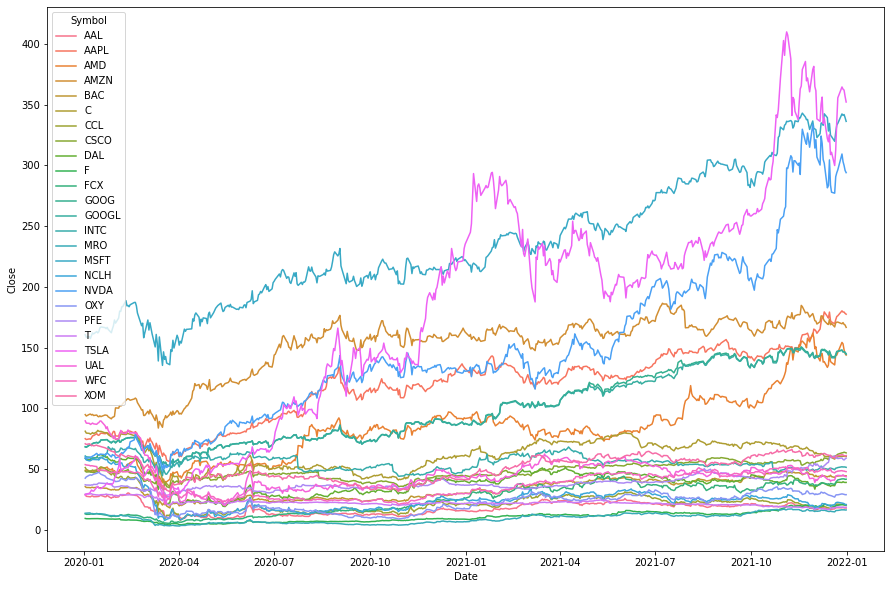

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
sns.lineplot(x = 'Date', y = 'Close', hue = 'Symbol', data = df3)

i = 1
for line in plt.gca().lines:
    if i > 25:
        label = line.get_label()
        print(label)
        #plt.text(line.get_xdata()[-1] + 0.5, line.get_ydata()[-1], label, ha='left', va='center', fontsize=10)
    i = i + 1

# show the plot
plt.show()